In [1]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:

# split data table into data X and class labels y

X = df.ix[:,0:4].values
y = df.ix[:,4].values

In [3]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
tls.set_credentials_file(username='viken.parikh', api_key='QurABfdXuM5wuxJQZUmd')


In [4]:

# plotting histograms

traces = []

legend = {0:False, 1:False, 2:False, 3:True}

colors = {'Iris-setosa': 'rgb(31, 119, 180)', 
          'Iris-versicolor': 'rgb(255, 127, 14)', 
          'Iris-virginica': 'rgb(44, 160, 44)'}

for col in range(4):
    for key in colors:
        traces.append(Histogram(x=X[y==key, col], 
                        opacity=0.75,
                        xaxis='x%s' %(col+1),
                        marker=Marker(color=colors[key]),
                        name=key,
                        showlegend=legend[col]))

data = Data(traces)

layout = Layout(barmode='overlay',
                xaxis=XAxis(domain=[0, 0.25], title='sepal length (cm)'),
                xaxis2=XAxis(domain=[0.3, 0.5], title='sepal width (cm)'),
                xaxis3=XAxis(domain=[0.55, 0.75], title='petal length (cm)'),
                xaxis4=XAxis(domain=[0.8, 1], title='petal width (cm)'),
                yaxis=YAxis(title='count'),
                title='Distribution of the different Iris flower features')

fig = Figure(data=data, layout=layout)
#py.iplot(fig)


In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [6]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [7]:

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


In [8]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


In [9]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [10]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [11]:

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.91081808375
0.921220930707
0.147353278305
0.0206077072356


In [12]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)

#py.iplot(fig)

In [13]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [14]:
Y = X_std.dot(matrix_w)

In [15]:
traces = []

for name in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):

    trace = Scatter(
        x=Y[y==name,0],
        y=Y[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(showlegend=True,
                scene=Scene(xaxis=XAxis(title='PC1'),
                yaxis=YAxis(title='PC2'),))

fig = Figure(data=data, layout=layout)
#py.iplot(fig)

In [16]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [17]:
traces = []

for name in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):

    trace = Scatter(
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False))
fig = Figure(data=data, layout=layout)
#py.iplot(fig)

In [18]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='results.csv', 
    sep=',')
'''
df.columns=["Roll No","Full Name","Pointer FY","Pointer SY","Pointer TY",
            "Daily distance of travel to college in km",
            "Number of hrs of daily study","Tuition class",
            "Hobby","Gender","Separate room for study",
            "Appearing for competitive exams","pursuing higher studies",
            "Campus Placement","extracurricular activities",
            "JEE main score","Pointer of Sem VII marks"]
'''
df=df[["Pointer FY","Pointer SY","Pointer TY",
            "Daily distance of travel to college in km",
            "Number of hrs of daily study","Tuition class",
            "Hobby","Gender","Separate room for study",
            "Appearing for competitive exams","pursuing higher studies",
            "Campus Placement","extracurricular activities",
            "JEE main score","Pointer of Sem VII marks"]]

df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.ix[:,14]=df.ix[:,14].fillna(7)
df.ix[:,:]=df.ix[:,:].fillna(0)
df.ix[:,:]=np.ceil(df.ix[:,:]).astype(int)
df.tail()

,Pointer FY,Pointer SY,Pointer TY,Daily distance of travel to college in km,Number of hrs of daily study,Tuition class,Hobby,Gender,Separate room for study,Appearing for competitive exams,pursuing higher studies,Campus Placement,extracurricular activities,JEE main score,Pointer of Sem VII marks
47,10,10,9,44,2,0,1,1,1,1,1,1,1,131,7
48,8,9,7,6,1,0,1,1,0,1,1,0,0,112,8
49,7,7,8,1,0,0,1,1,0,1,1,1,1,100,8
50,10,8,8,22,1,0,1,1,0,0,0,1,1,109,7
51,10,10,9,16,1,0,1,0,1,1,0,1,0,89,9


In [19]:
# In[2]:

# split data table into data X and class labels y

X1 = df.ix[:,0:14].values
y1 = df.ix[:,14].values


# In[3]:

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
tls.set_credentials_file(username='viken.parikh', api_key='QurABfdXuM5wuxJQZUmd')

In [20]:
# In[5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



In [21]:
# In[6]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


# In[7]:


cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


# In[8]:

cor_mat2 = np.corrcoef(X1.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


# In[9]:

u,s,v = np.linalg.svd(X_std.T)
u


# In[10]:

for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')


# In[11]:


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


# In[12]:

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
#py.iplot(fig)

Covariance matrix 
[[  1.02000000e+00   3.27695127e-01   2.55693623e-01  -1.15302917e-01
    2.29884007e-01   1.02909625e-01   1.09579654e-01  -8.50276828e-02
    4.05520731e-02   1.45536187e-02   1.54820780e-02   1.40153549e-01
    2.54068798e-02   3.76282788e-01]
 [  3.27695127e-01   1.02000000e+00   9.25059400e-01   2.32938029e-02
   -4.68092319e-01   6.31412536e-03  -1.01311083e-01  -2.10308720e-01
    1.80139450e-01  -7.14361737e-02   2.32980071e-01  -7.29937561e-02
   -4.48173720e-02  -2.06966830e-01]
 [  2.55693623e-01   9.25059400e-01   1.02000000e+00  -5.25413368e-02
   -4.61281417e-01   9.07113409e-02  -1.05852872e-01  -2.03587471e-01
    1.75976743e-01  -4.93404648e-02   2.47523196e-01  -3.42554424e-02
    1.50737610e-02  -3.25691874e-01]
 [ -1.15302917e-01   2.32938029e-02  -5.25413368e-02   1.02000000e+00
   -9.31363243e-02  -1.41629444e-01   1.07595276e-01  -1.99464901e-01
    7.55151044e-02  -2.43172528e-01  -2.25930864e-02  -8.12956473e-02
    1.68550589e-01  -1.9684184

In [22]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(14,1), 
                      eig_pairs[1][1].reshape(14,1)))

print('Matrix W:\n', matrix_w)

X2 = X_std.dot(matrix_w)
#print(Y.shape)

Matrix W:
 [[ -6.97543053e-02  -2.66911083e-01]
 [ -5.34391767e-01   3.02324146e-04]
 [ -5.39228042e-01  -1.22935140e-02]
 [ -6.43003725e-02   3.06637603e-01]
 [  3.77620324e-01  -3.25784032e-01]
 [  3.35062901e-02  -3.69251310e-01]
 [  7.82188078e-02   8.91772535e-02]
 [  2.15921991e-01   4.66086399e-02]
 [ -2.46197792e-01  -1.47247222e-01]
 [ -4.35578607e-02  -5.54667261e-01]
 [ -2.58542936e-01  -4.23456983e-01]
 [  1.22373431e-01   9.66994628e-02]
 [  3.04115585e-02  -2.72984411e-02]
 [  2.70079392e-01  -2.51445016e-01]]


In [23]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

[ 9.  9.  9.  8.  9.  8.  9.  9.  9.  9.  9.]
[ 9  9  9  9  9  7  9  9  9 10  9]
Rmse using sklearn
0.615867387749
r2 using sklearn
0.150103530475
Rmse using sklearn and cross validation
[-0.94653195 -1.18345784 -0.12056808 -0.70034772 -0.11038333 -0.87751386
 -0.75336515 -0.09203308 -0.38996982 -0.47304243]


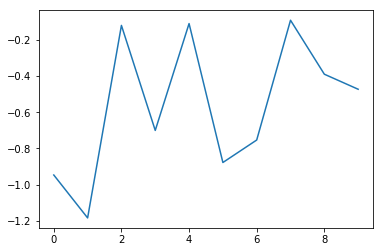

r2 using sklearn and cross validation
[ 0.97289874  1.08786849  0.34722915  0.8368678   0.33223987  0.9367571
  0.8679661   0.30336955  0.62447564  0.6877808 ]


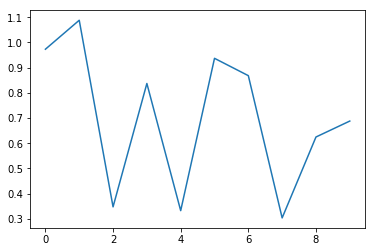

Accuracy After PCA is  0.727272727273


In [27]:
'''
data = pd.read_csv("results.csv")
#print(data.shape)
data.head()
x_train = data[['Pointer FY','Pointer SY','Pointer TY','Daily distance of travel to college in km','Number of hrs of daily study','Tuition class','Hobby','Gender','Separate room for study','Appearing for competitive exams','pursuing higher studies','Campus Placement','extracurricular activities','JEE main score']]
#print(x_train)
y_train=data[['Pointer of Sem VII marks']]
#print(x_test)
x=np.array(x_train).T
y=np.array(y_train)
X=x.reshape(54,14)
Y=y.reshape(54,1)
'''
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X2,y1,test_size=0.2)

reg = LinearRegression()
reg = reg.fit(x_train, y_train)
Y_pred = reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
r2 = reg.score(x_test, y_test)
Y_pred=np.around(Y_pred, 0)

print(Y_pred)
print(y_test)


print("Rmse using sklearn")
print(rmse)

print("r2 using sklearn")
print(r2)

print("Rmse using sklearn and cross validation")
scores = cross_val_score(reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(scores)
plt.plot(scores.T )
plt.show()

print("r2 using sklearn and cross validation")
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
plt.plot(rmse_scores.T )
plt.show()

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, Y_pred)

print("Accuracy After PCA is ",accuracy)